### Network Intrusion Detection using Machine Learning with 99.70% Accuracy

In [2]:
"""
@authors: berfin-canbolant, ulas-kaplan
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

##Data Preprocessing


In [4]:
df=pd.read_csv("Train_data.csv")
random_state = 7
X = df.drop(columns = ["class"])
y = df["class"]

In [5]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df["class"].value_counts()

,count
class,
normal,13449
anomaly,11743


##Data Visualization and Label Encoding



In [8]:
label_encoder = preprocessing.LabelEncoder()
X['protocol_type']= label_encoder.fit_transform( X["protocol_type"] )
X["flag"]=label_encoder.fit_transform(X["flag"])
X["service"]=label_encoder.fit_transform(X["service"])
y=(y== "normal").astype(int)

<Axes: xlabel='class', ylabel='Count'>

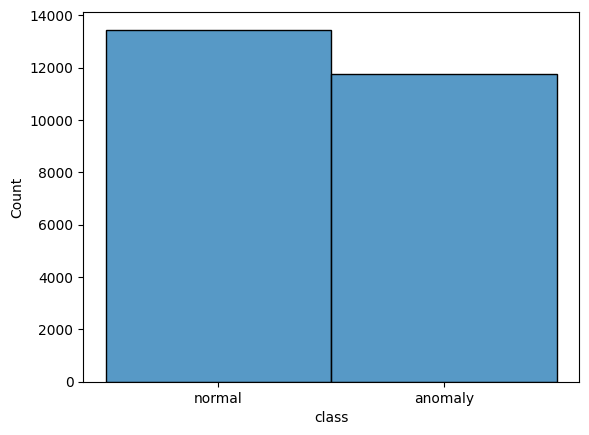

In [9]:
sns.histplot(df["class"], kde=False)

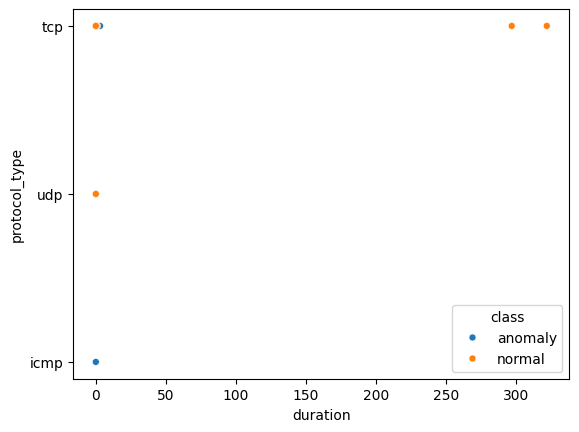

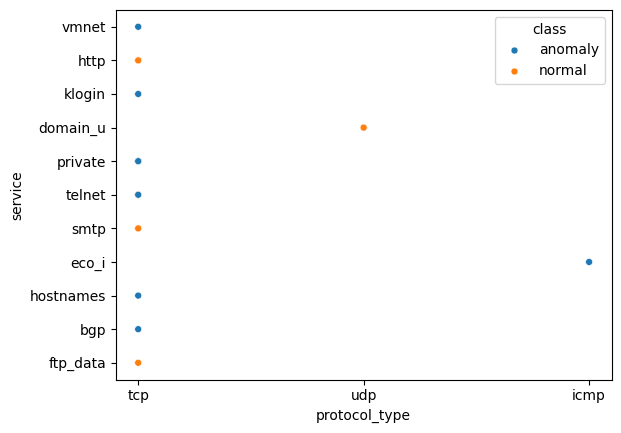

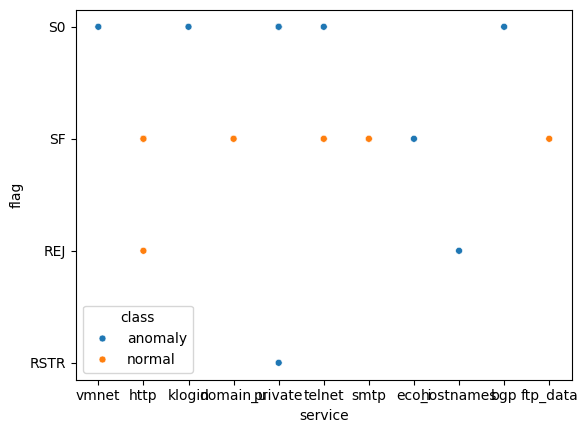

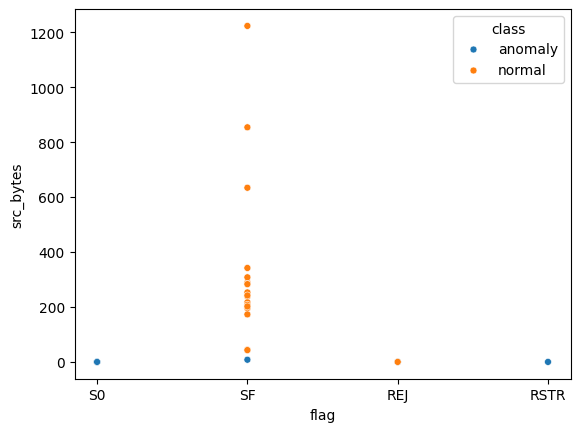

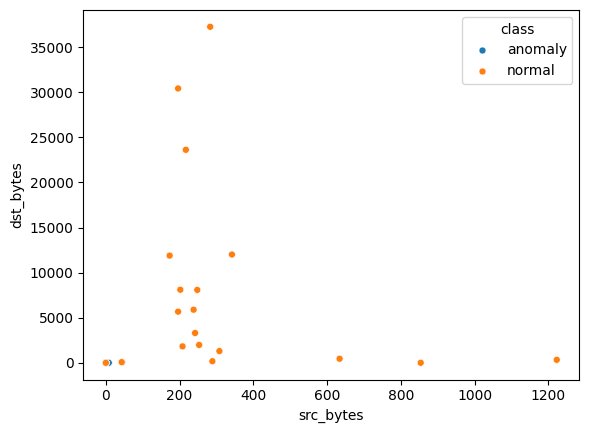

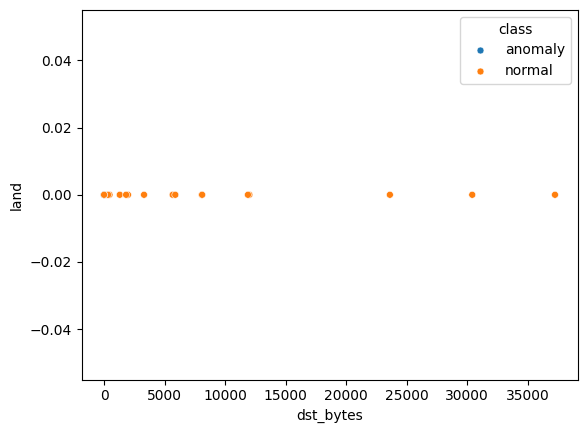

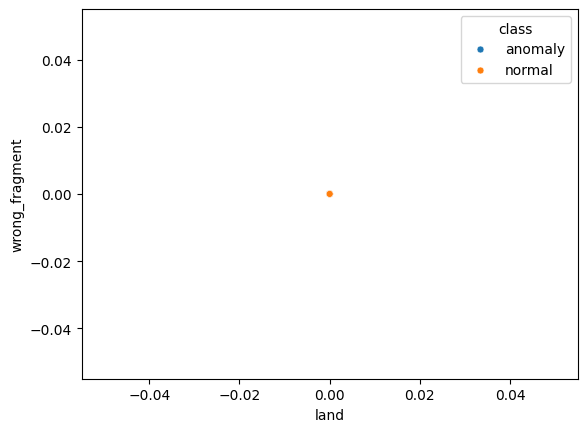

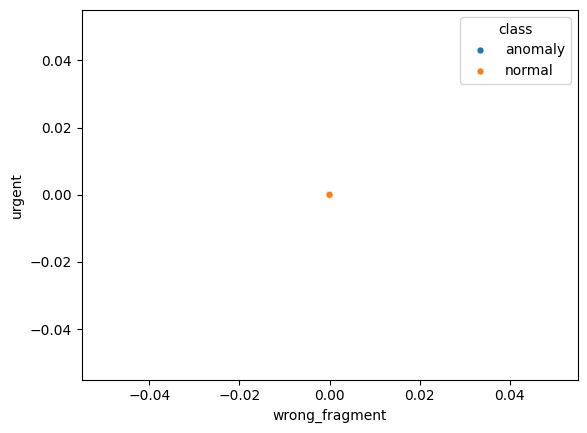

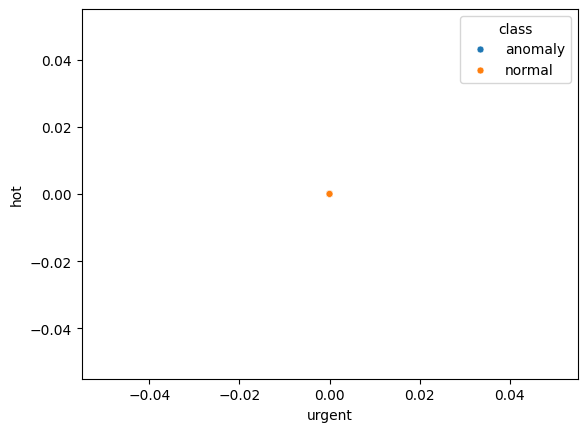

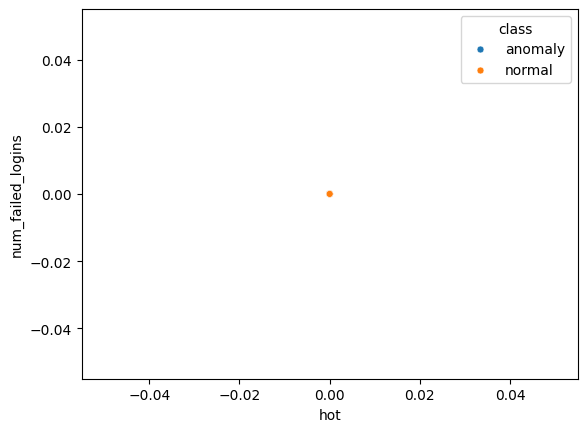

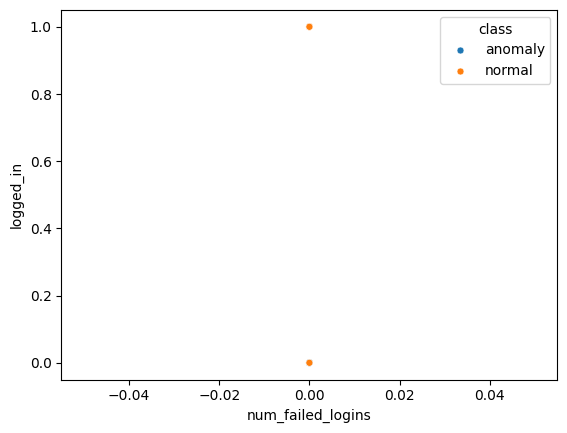

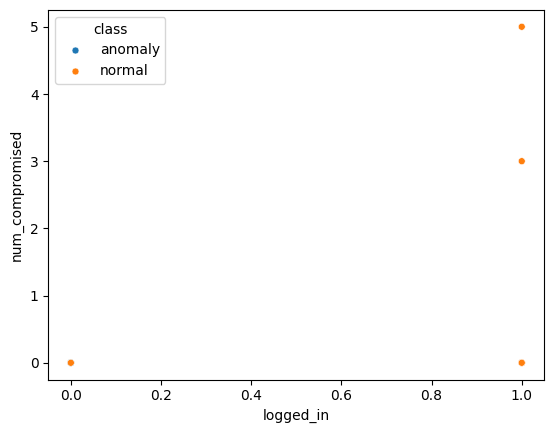

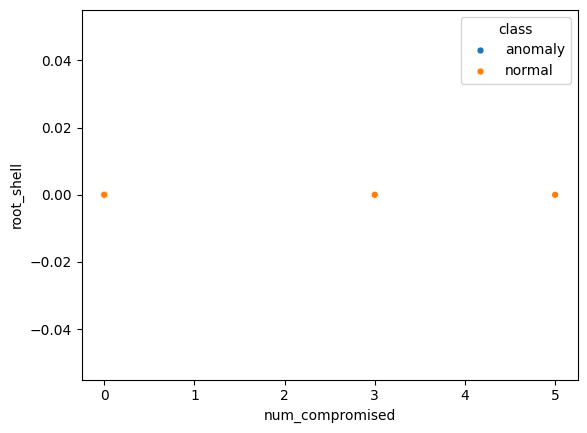

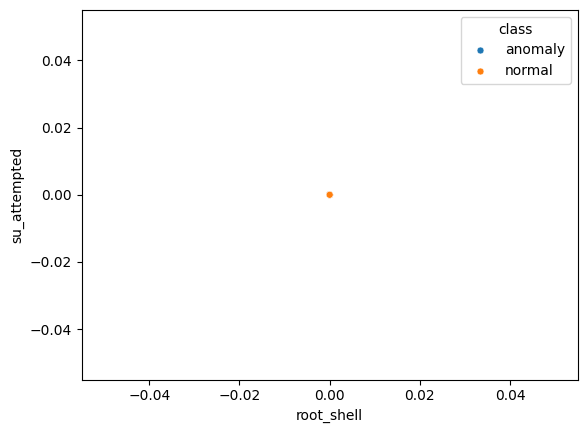

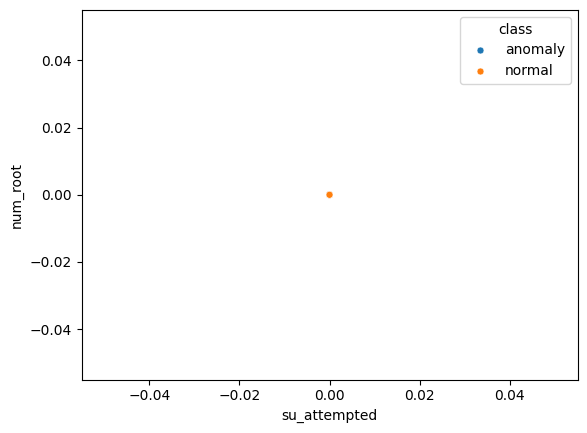

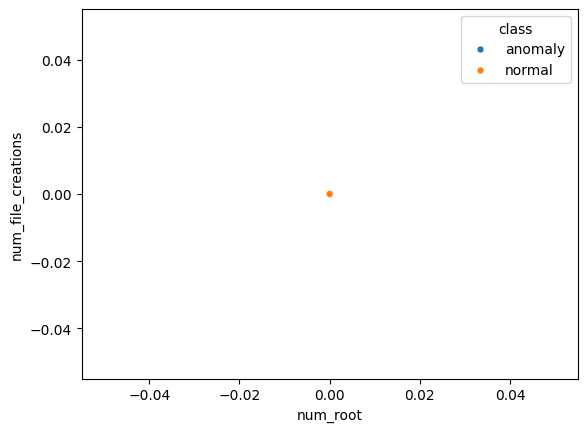

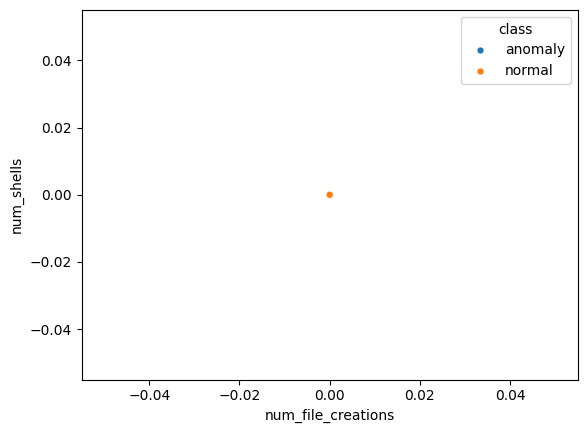

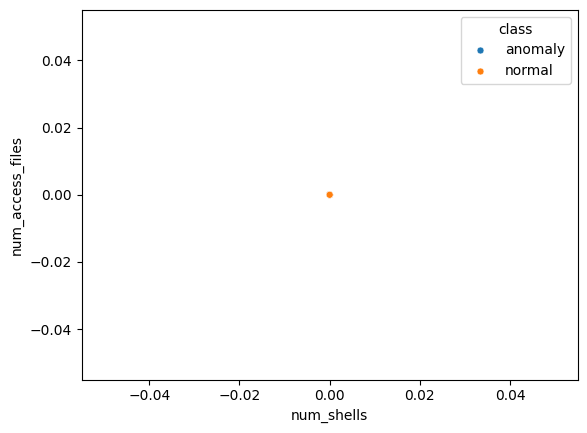

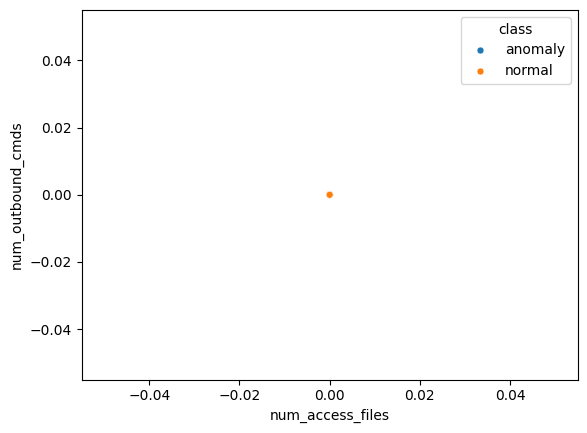

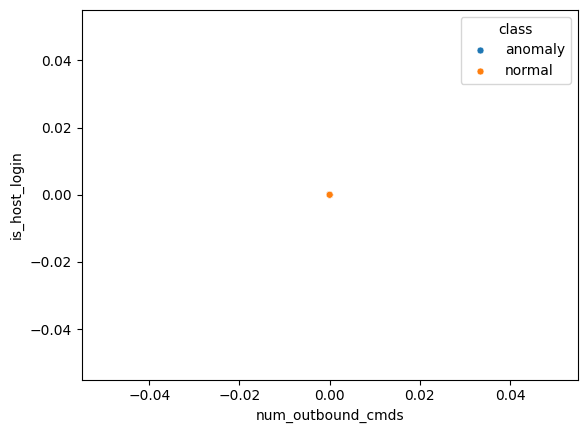

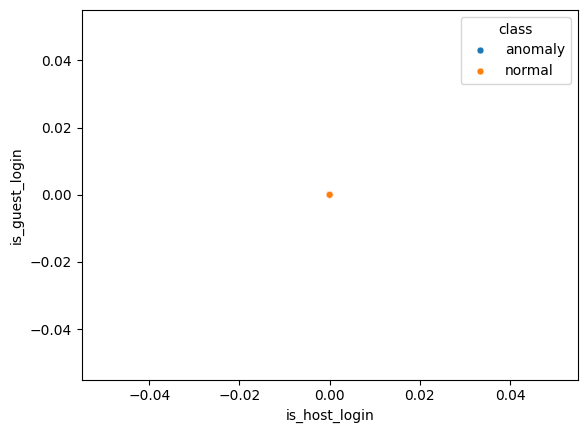

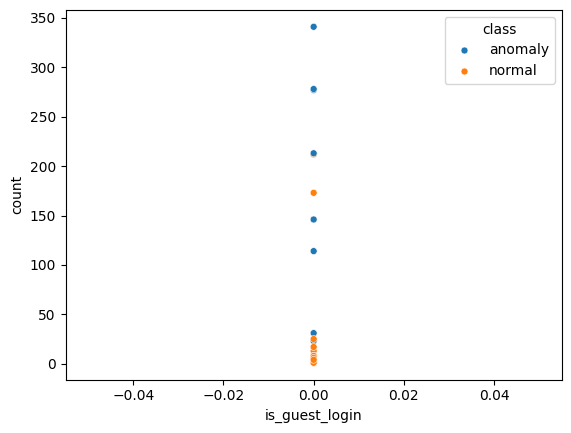

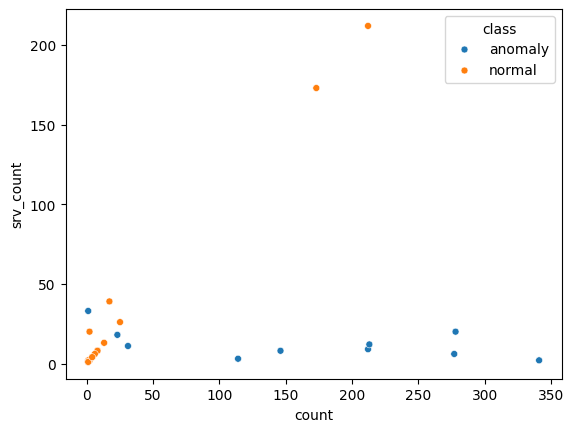

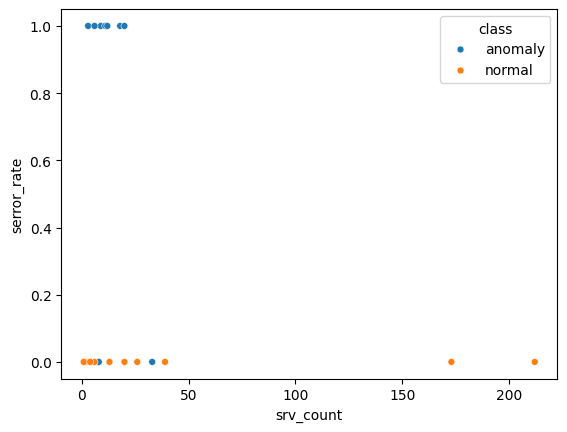

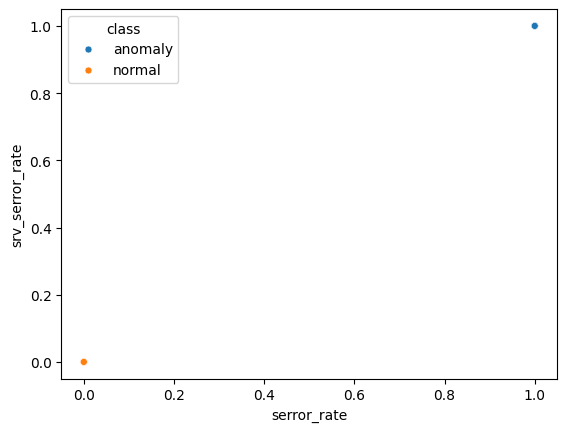

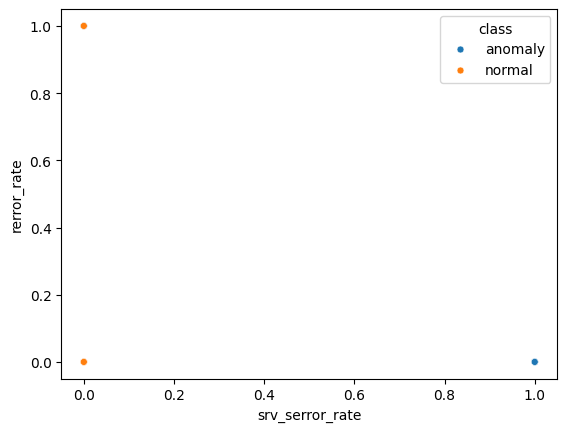

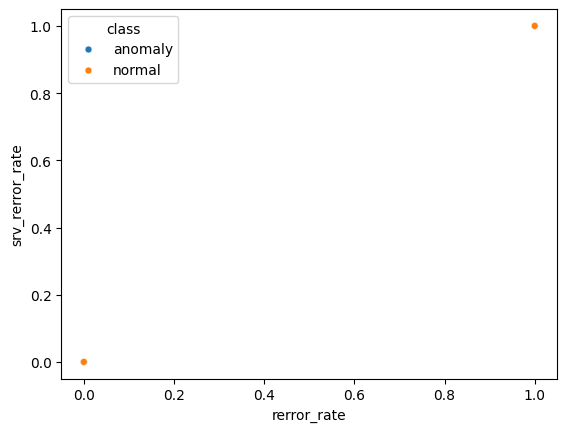

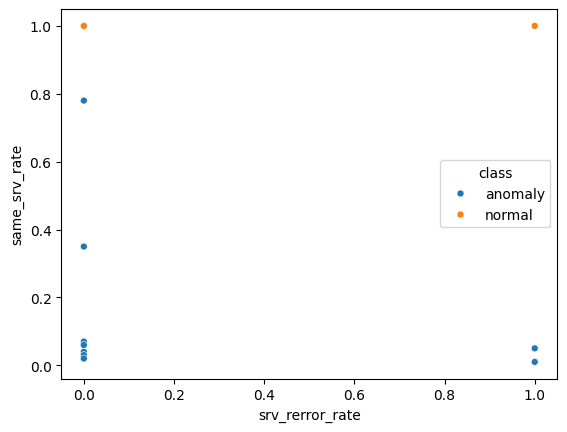

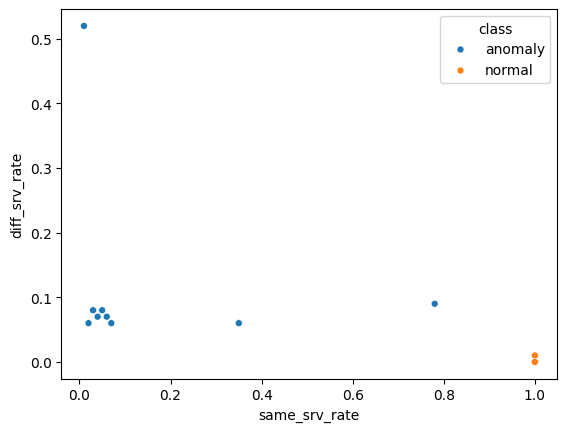

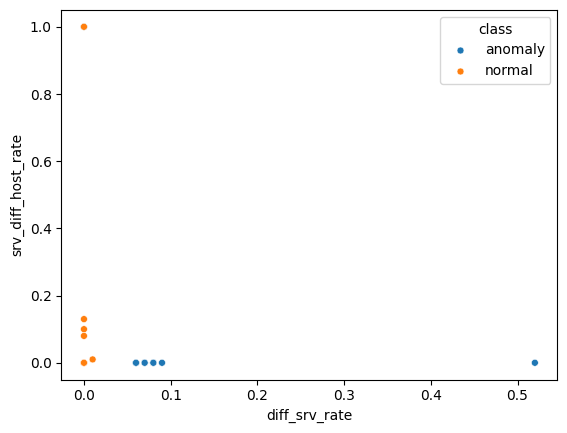

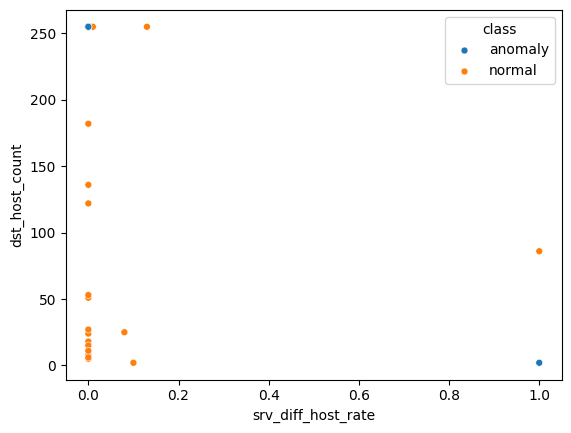

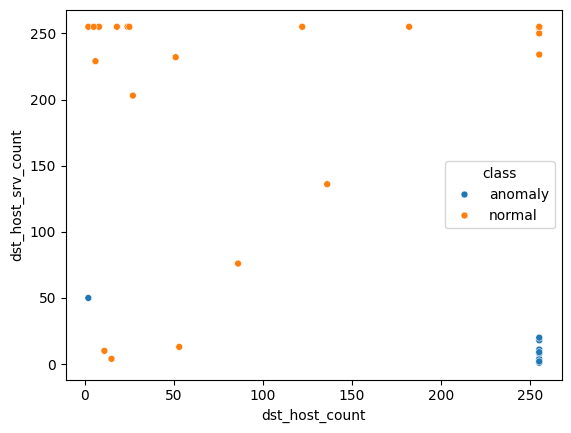

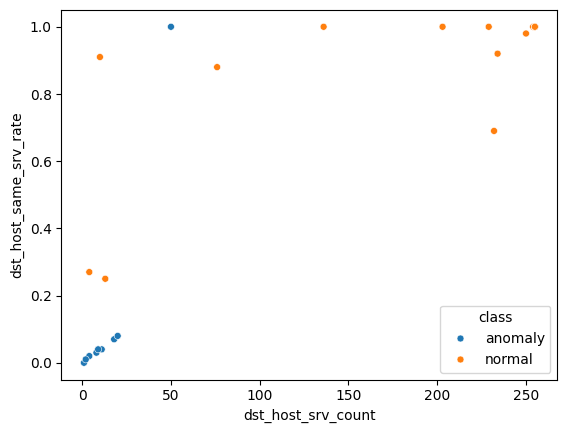

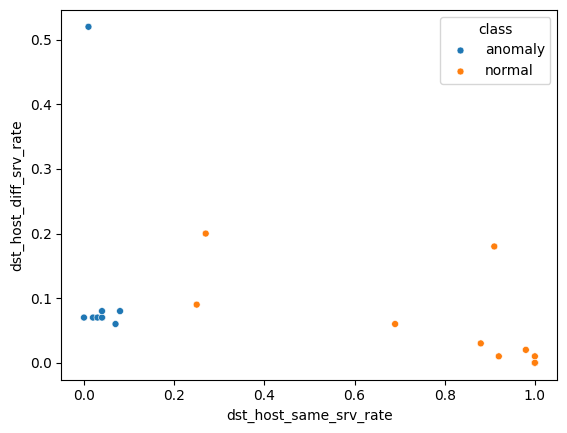

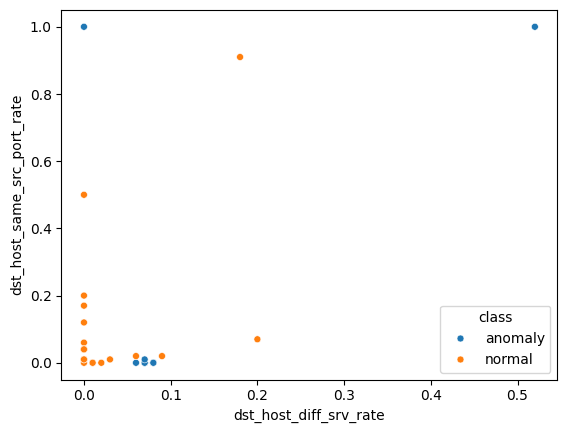

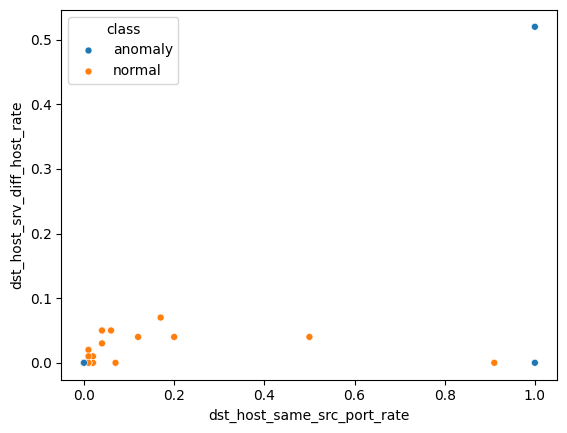

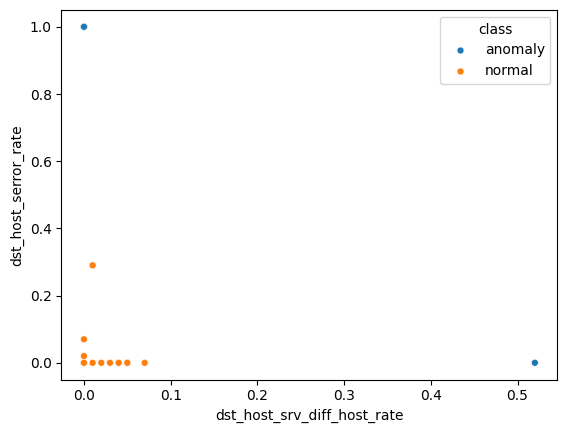

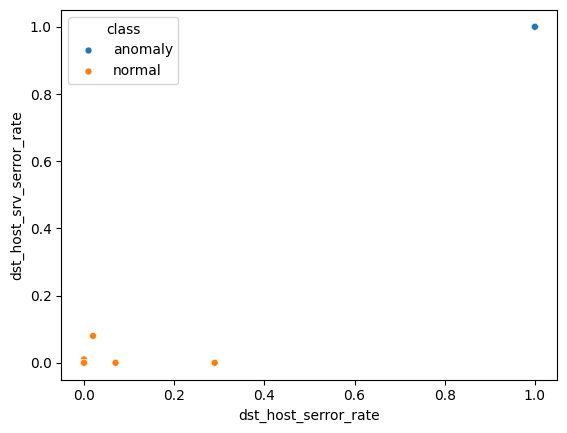

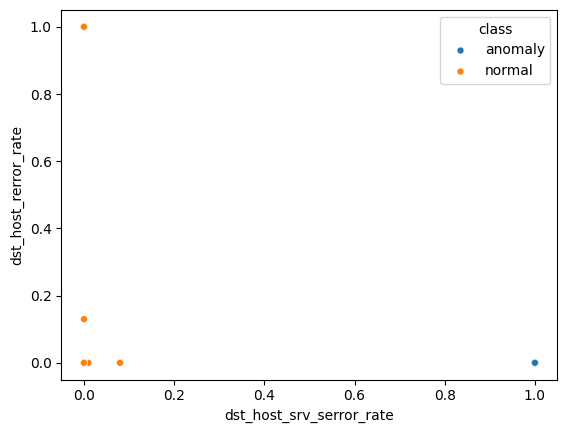

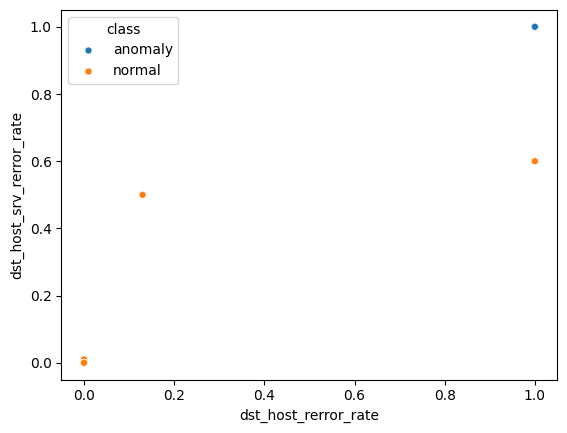

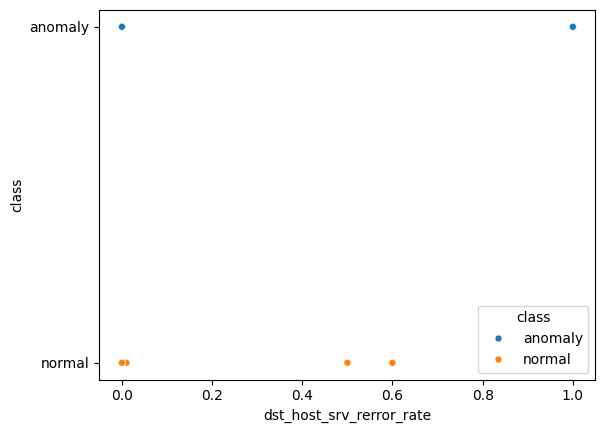

In [10]:
a = df.sample(n=30)
n = 0

while n < len(a.columns)-1:
    b = a.columns[n]
    c = a.columns[n+1]
    sns.scatterplot(x=b, y=c, data=a, hue="class",s=25)
    plt.show()
    n+=1

##Feature Engineering

In [11]:
random_state = 7
r2 = RandomForestRegressor(random_state=random_state)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [13]:
sc_x=StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [14]:
chosed_model = r2
chosed_model.fit(X_train,y_train)

RandomForestRegressor(random_state=7)

In [15]:
feature_imp1 = pd.Series(chosed_model.feature_importances_, index = X.columns)
thresholds = sort(feature_imp1.nlargest(41) )

<Axes: >

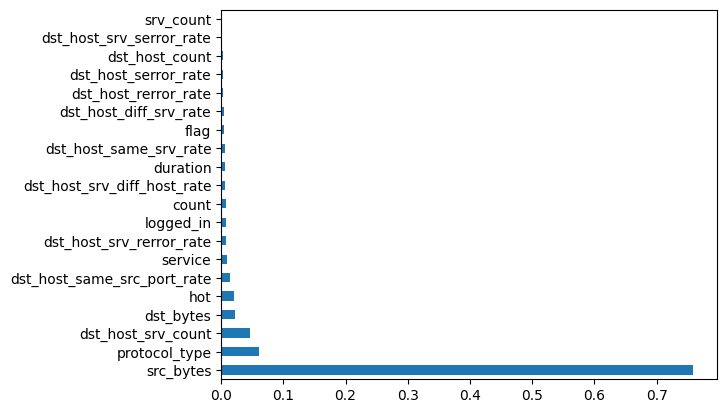

In [16]:
feature_imp1 = pd.Series(chosed_model.feature_importances_, index = X.columns)
thresholds = sort(feature_imp1.nlargest(41) )
feature_imp1.nlargest(20).plot(kind="barh")

In [17]:
k = 41
column_names = ['RF']
thresholds_df_mae = pd.DataFrame(np.nan, index=range(0,k), columns=column_names)

for thresh in thresholds:
    k = k-1
    selection = SelectFromModel(chosed_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)

    results_on_test_feature_imp = pd.DataFrame(np.nan,index = [0],columns = column_names)

    model = RandomForestRegressor(random_state=random_state)
    model.fit(select_X_train,y_train)
    y_pred = model.predict(select_X_test)
    name = "RF"
    results_on_test_feature_imp[name] = mean_absolute_error(y_test,y_pred)
    thresholds_df_mae.loc[k] = np.array(results_on_test_feature_imp)

Text(0, 0.5, 'MAE')

<Figure size 2000x1000 with 0 Axes>

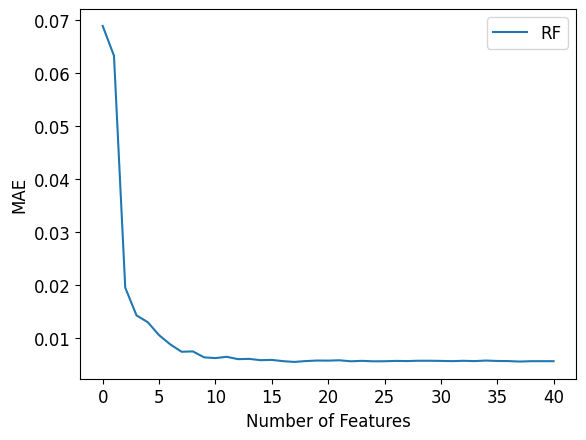

In [18]:
plt.figure(figsize=(20,10))
plt.rc('font',size=12)

thresholds_df_mae.plot.line()
plt.xlabel('Number of Features')
plt.ylabel('MAE')

####Creating a new dataset according to the optimal number of features and their importance

In [19]:
df2= df[[
"dst_host_count",
"dst_host_serror_rate",
"dst_host_rerror_rate",
"dst_host_diff_srv_rate",
"flag",
"dst_host_same_srv_rate",
"duration",
"dst_host_srv_diff_host_rate",
"count",
"logged_in",
"dst_host_srv_rerror_rate",
"service",
"dst_host_same_src_port_rate",
"hot",
"dst_bytes",
"dst_host_srv_count",
"protocol_type",
"src_bytes",
"class" ] ]

##Label Encoding for new dataset

In [20]:
X2 = df2.drop(columns = ["class"])
y2 = df2["class"]
label_encoder = preprocessing.LabelEncoder()
X2['protocol_type']= label_encoder.fit_transform( X2["protocol_type"] )
X2["flag"]=label_encoder.fit_transform(X2["flag"])
X2["service"]=label_encoder.fit_transform(X2["service"])
y2=(y2== "normal").astype(int)

##Train Test Split

In [21]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,random_state=0)

In [22]:
sc_x2=StandardScaler()
X2_train = sc_x2.fit_transform(X2_train)
X2_test = sc_x2.transform(X2_test)

##Model Fitting KNN

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y2_pred = knn.predict(X2_test)

##Accuracy for KNN

In [26]:
print("Accuracy", accuracy_score(y2_test, y2_pred)*100)

Accuracy 99.70232188926374


##Confusion Matrix and Classification Report

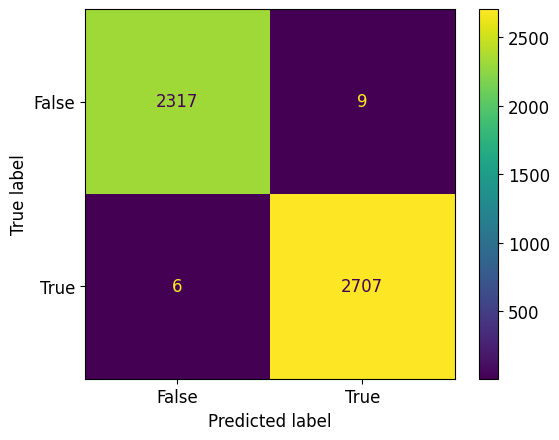

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2713

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [27]:
confusion_matrixKNN = metrics.confusion_matrix(y2_test, y2_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixKNN, display_labels = [False, True])
cm_display.plot()
plt.show()

class_reportKNN = classification_report(y2_test, y2_pred)
print("Classification Report:\n", class_reportKNN)

##Model Fitting SVM

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X2_train, y2_train)

SVC(random_state=0)

In [29]:
y2_pred2 = classifier.predict(X2_test)

In [30]:
print("Accuracy:", accuracy_score(y2_test,y2_pred2)*100)

Accuracy: 98.96804921611431


##Model Fitting MLP

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                    max_iter=5000, random_state=42)

In [33]:
mlp.fit(X2_train, y2_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=5000, random_state=42)

In [34]:
y3_pred3 = mlp.predict(X2_test)

In [35]:
accuracy = accuracy_score(y2_test, y3_pred3)
print(accuracy*100)

99.40464377852749
